In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('train.csv', encoding='cp949')

df['transaction_year'] = df['transaction_year_month'].apply(lambda x: int(str(x)[:4]))
df['transaction_month'] = df['transaction_year_month'].apply(lambda x: int(str(x)[4:]))
df = df.drop(columns=['transaction_year_month'])

df['sigungu'] = df['sigungu'].astype(str)
df['jibun'] = df['jibun'].astype(str)
df['apt_name'] = df['apt_name'].astype(str)

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
df_encoded = pd.DataFrame(ohe.fit_transform(df[['sigungu', 'jibun', 'apt_name']]))
df_encoded.index = df.index
df_num = df.drop(['sigungu', 'jibun', 'apt_name'], axis=1)
df = pd.concat([df_num, df_encoded], axis=1)

df.columns = df.columns.astype(str)

X = df.drop(columns=['id', 'transaction_real_price'])
y = df['transaction_real_price']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

#--------------------------------------------------------------#

test_df = pd.read_csv('test.csv', encoding='cp949')

test_df = test_df[test_df['jibun'] != '977']

test_df['transaction_year'] = test_df['transaction_year_month'].apply(lambda x: int(str(x)[:4]))
test_df['transaction_month'] = test_df['transaction_year_month'].apply(lambda x: int(str(x)[4:]))
test_df = test_df.drop(columns=['transaction_year_month'])

test_df['sigungu'] = test_df['sigungu'].astype(str)
test_df['jibun'] = test_df['jibun'].astype(str)
test_df['apt_name'] = test_df['apt_name'].astype(str)

test_df_encoded = pd.DataFrame(ohe.transform(test_df[['sigungu', 'jibun', 'apt_name']]))
test_df_encoded.index = test_df.index
test_df_num = test_df.drop(['sigungu', 'jibun', 'apt_name'], axis=1)
test_df = pd.concat([test_df_num, test_df_encoded], axis=1)

test_df.columns = test_df.columns.astype(str)

X_test = test_df.drop(columns=['id'])
preds_test = model.predict(X_test)

mae = mean_absolute_error(y_valid, preds_valid)
print("(MAE)", mae)


#submission_df = pd.DataFrame({'id': test_df['id'], 'transaction_real_price': preds_test})
#submission_df.to_csv('submission.csv', index=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(MAE) 7096.193902535973


Text(0, 0.5, 'Frequency')

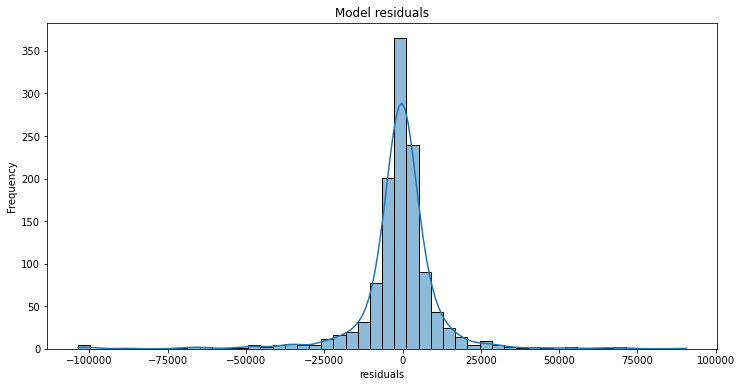

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

preds_valid = model.predict(X_valid)

residuals = y_valid - preds_valid

plt.figure(figsize=(12,6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Model residuals')
plt.xlabel('residuals')
plt.ylabel('Frequency')